In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape


(847, 2)

In [ ]:
#eda

In [6]:
print(f"Date range of gold prices available from -{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from -1950-01 to 2020-07


In [7]:
date = pd.date_range (start = '1/1/1950' , end = '8/1/2020' , freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [8]:
df['month'] = date
df.drop('Date' , axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


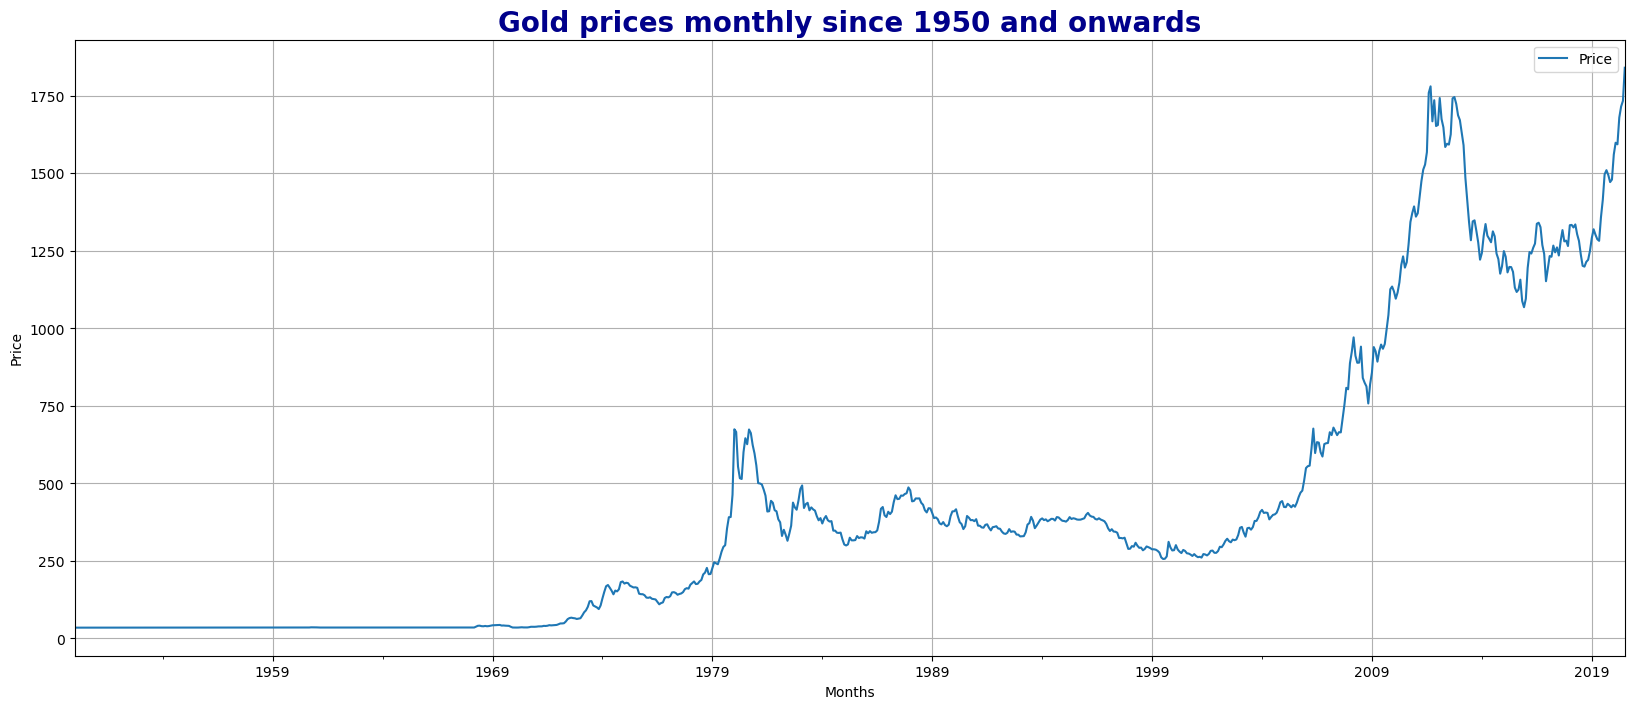

In [17]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards", fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

In [18]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


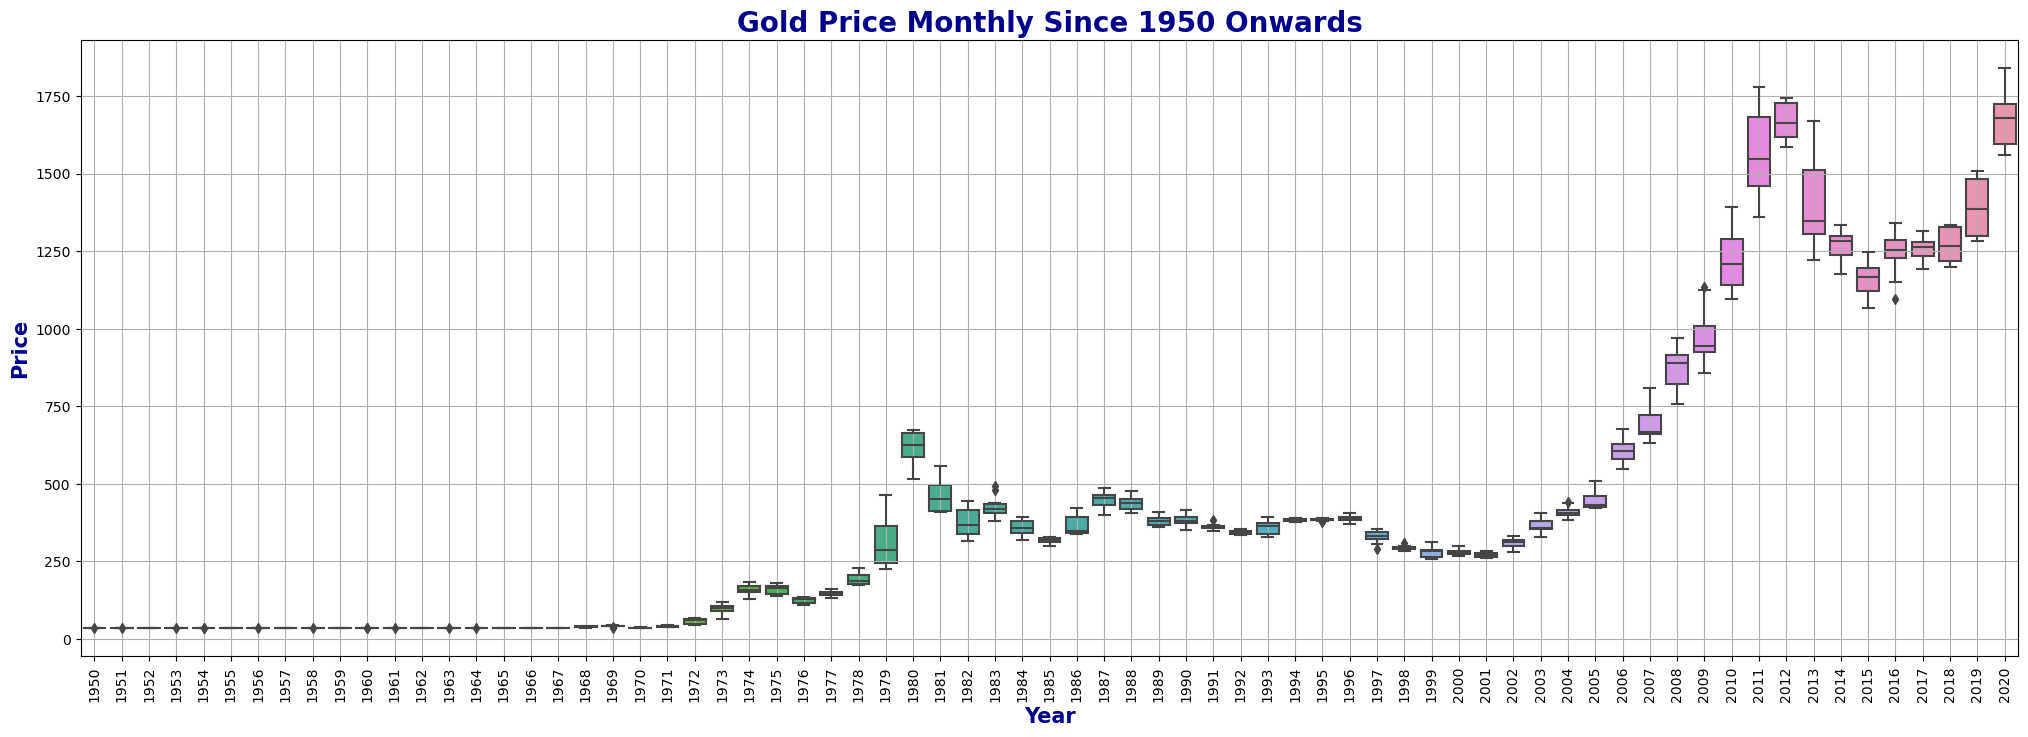

In [23]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year , y = df.values[:,0], ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Year', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.xticks(rotation = 90)
plt.grid()

Text(0, 0.5, 'Price')

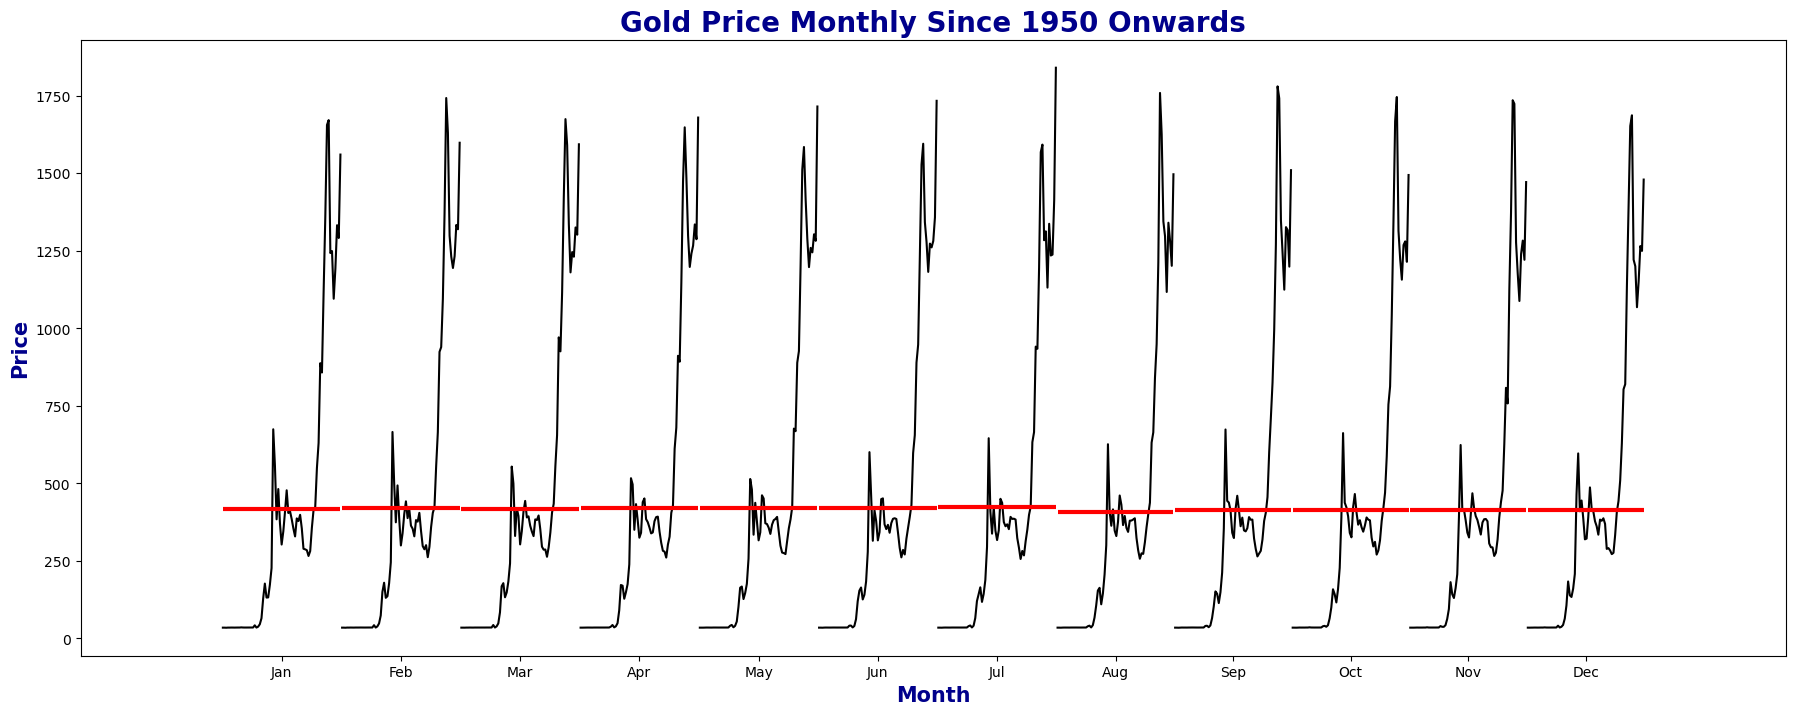

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax =plt.subplots(figsize=(22,8))
month_plot(df, ylabel =' Gold price' , ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')

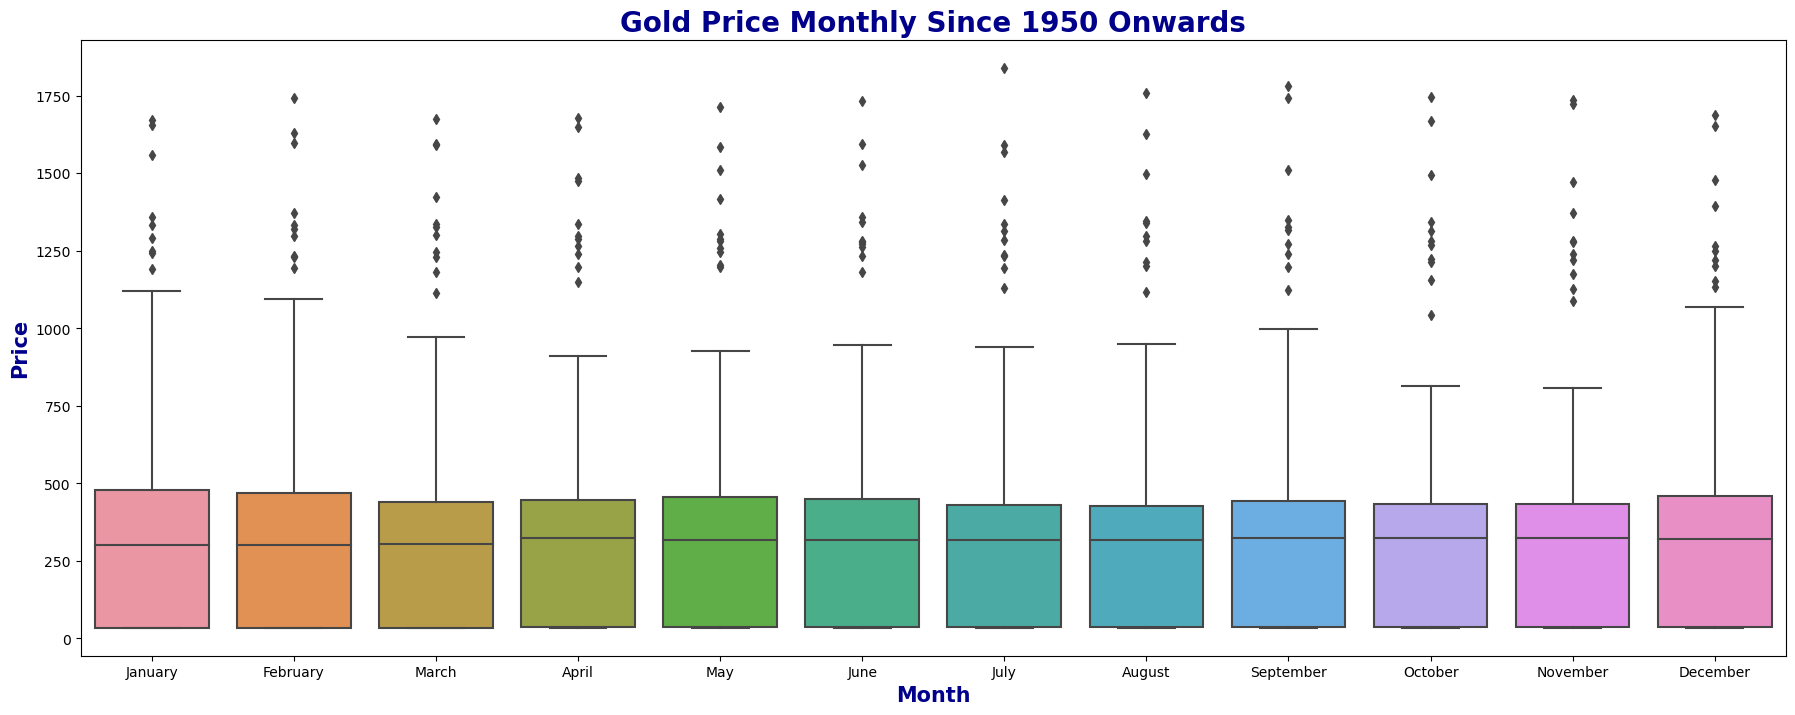

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),  y = df.values[:, 0], ax = ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.show()

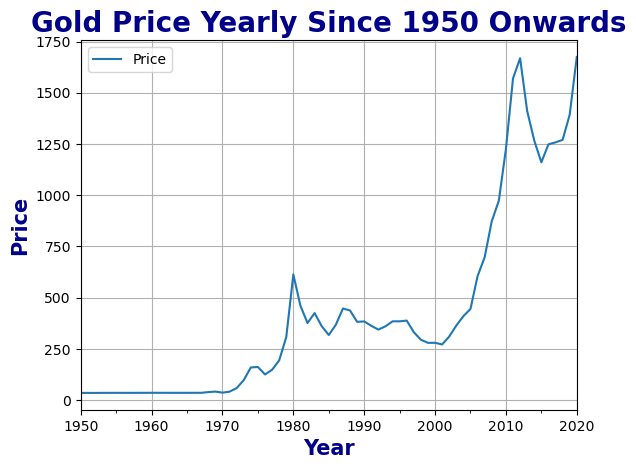

In [26]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Gold Price Yearly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Year', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

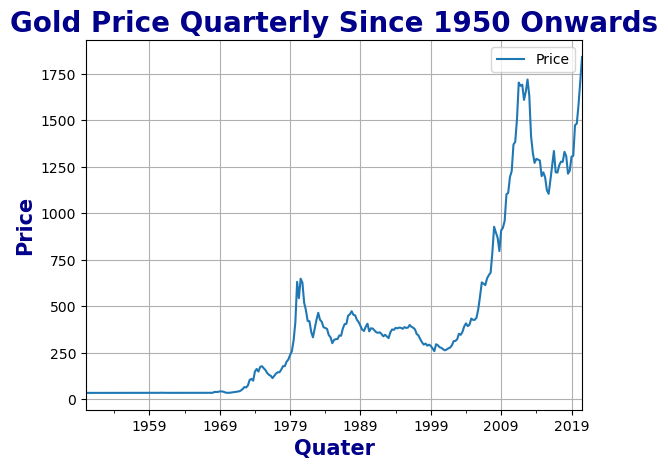

In [28]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title('Gold Price Quarterly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Quater', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

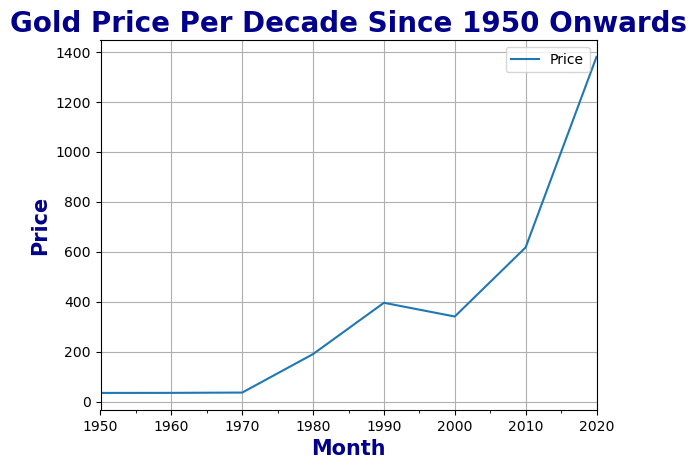

In [29]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Gold Price Per Decade Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

In [36]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index = True , right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


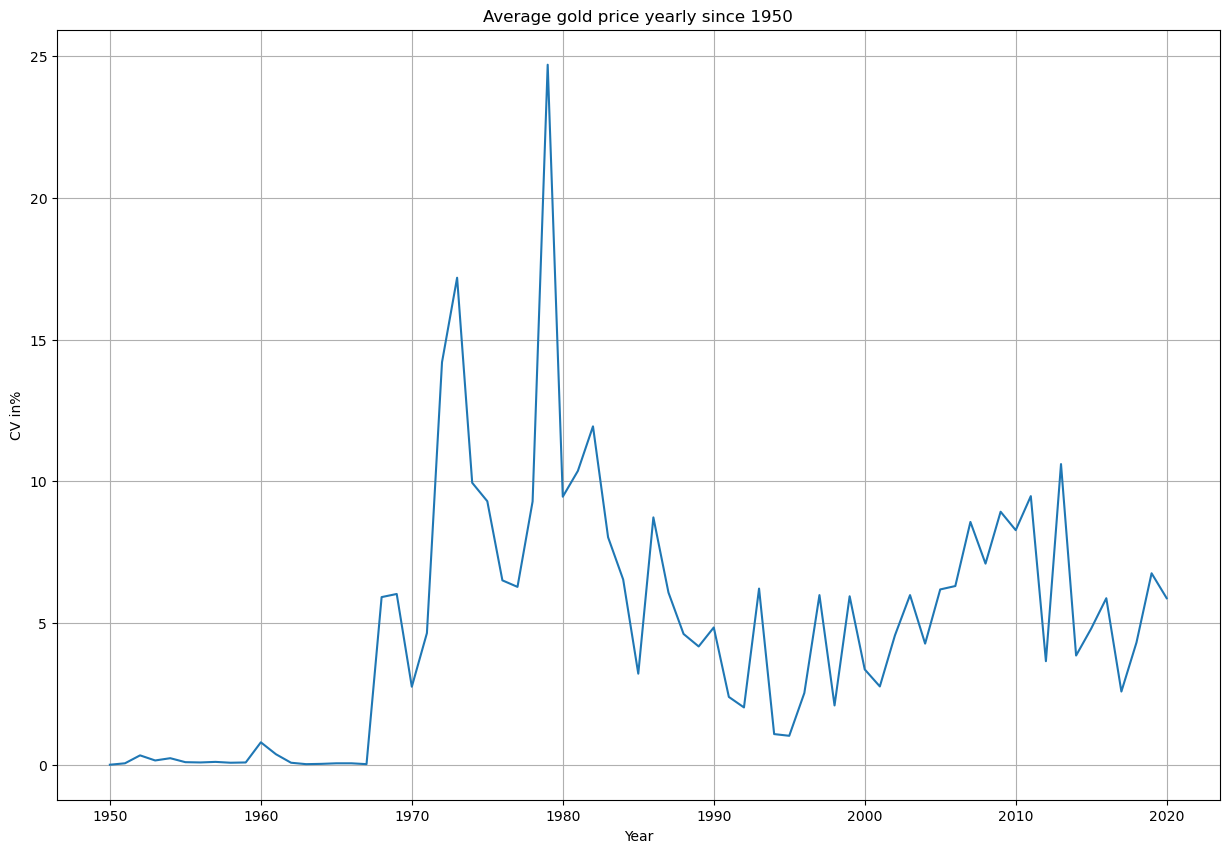

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot()
plt.title("Average gold price yearly since 1950")
plt.xlabel("Year")
plt.ylabel('CV in%')
plt.grid()

In [40]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [41]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


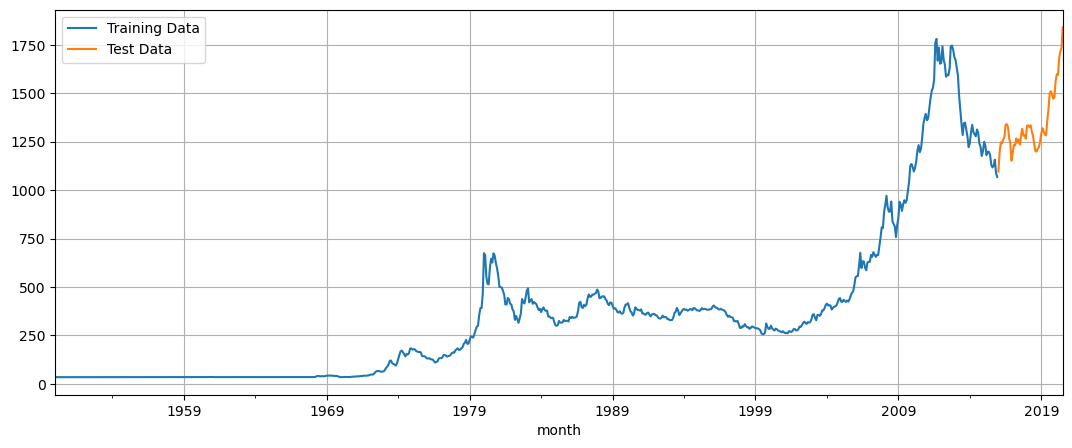

In [43]:
train["Price"].plot(figsize=(13,5), fontsize = 10)
test["Price"].plot(figsize=(13,5), fontsize = 10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [ ]:
#Linear Regression

In [46]:
train_time = [i+1 for i in range (len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)                                  

(792, 55)

In [48]:
LR_train = train.copy()
LR_test = test.copy()

In [49]:
LR_train['time'] = train_time
LR_test['time'] = test_time


In [50]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

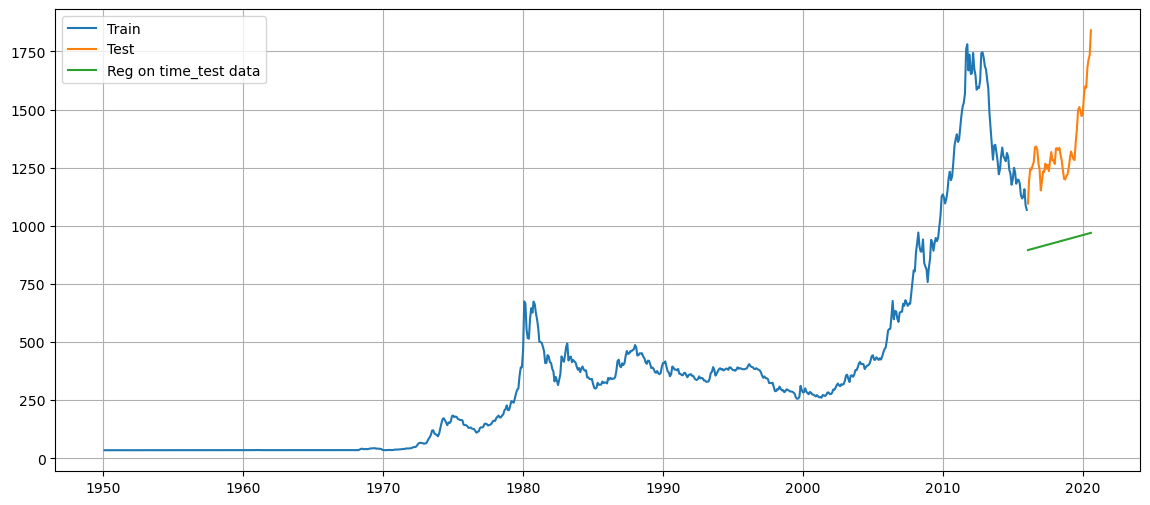

In [53]:
test_predictions_model1= lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'],label = 'Test')
plt.plot(LR_test['forecast'], label = 'Reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [55]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [57]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.5f"%(mape_model1_test),"%")

MAPE is 29.76000 %


In [61]:
results = pd.DataFrame({'Test Mape (%)' : [mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [ ]:
#Naive Bayes

In [62]:
naive_train = train.copy()
naive_test = test.copy()

In [63]:
naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

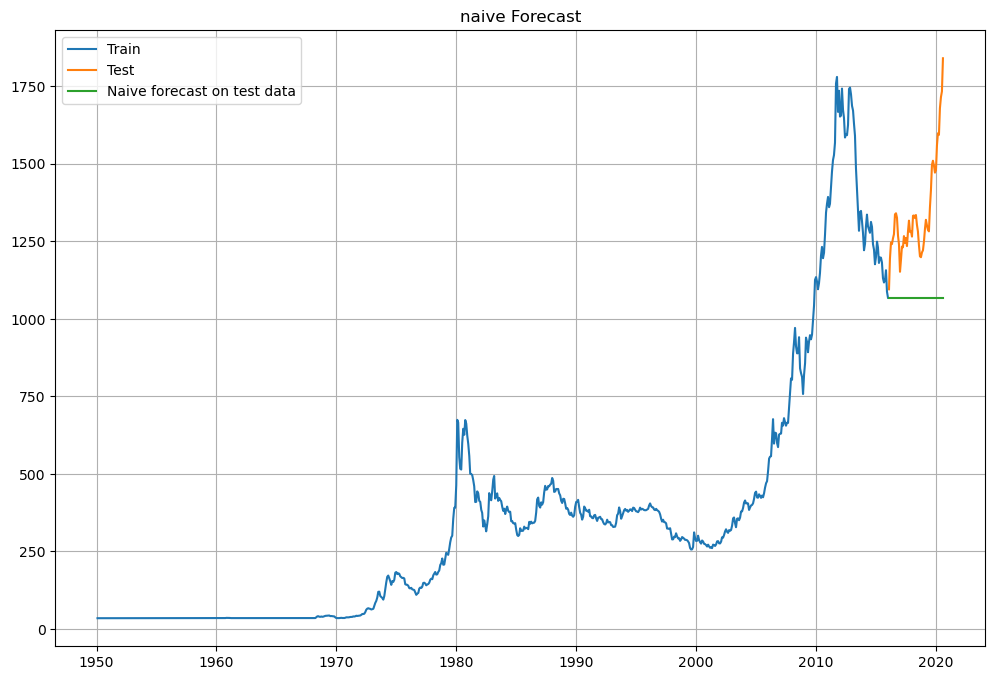

In [65]:
plt.figure(figsize= (12,8))
plt.plot(naive_train['Price'], label='Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(naive_test['naive'] , label = 'Naive forecast on test data')
plt.legend(loc = 'best')
plt.title("naive Forecast")
plt.grid()

In [68]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print("For Naive forecast on the test data, MAPE is %3.5f" % (mape_model2_test), "%")


For Naive forecast on the test data, MAPE is 19.38000 %


In [69]:
resultsDf_2 = pd.DataFrame({'Test MAPE(%)': [mape_model2_test]},index = ['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%),Test MAPE(%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [72]:
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                            smoothing_trend=0.3,
                                                            smoothing_seasonal=0.6)


In [73]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [78]:
prediction = final_model.forecast(steps=len(test))

In [79]:
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
